# Dados Campus Sertãozinho


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
dados = pd.read_csv('Relatorio_novo_1.CSV')

In [38]:
dados = dados.loc[dados['Modalidade'] != "FIC"]

In [39]:
dados = dados.drop(["Matrícula"],axis = 1)

# Filtros

In [40]:
dados['Modalidade'].value_counts()

Técnico Integrado                   1569
Licenciatura                        1413
Tecnologia                          1251
Técnico Concomitante/Subsequente    1061
Bacharelado                          875
Técnico Integrado EJA                821
Mestrado                             383
Técnico Subsequente                   97
Name: Modalidade, dtype: int64

In [41]:
dados = dados.loc[dados['Modalidade'] == 'Técnico Integrado EJA']
dados

,#,Ano de Ingresso,Deficiência,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Nacionalidade,Renda Per Capita,Sexo,Situação no Curso,Tipo de Escola de Origem
13,14,2008,Sem Necessidade Especial,TÉCNICO EM ADMINISTRAÇÃO INTEGRADO AO ENSINO M...,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,NaN,F,Cancelado,Pública
27,28,2008,Sem Necessidade Especial,TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO ...,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,NaN,M,Concluído,Pública
29,30,2010,Sem Necessidade Especial,TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO ...,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,NaN,M,Evasão,Pública
33,34,2017,Sem Necessidade Especial,TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO ...,SP,Parda,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,"1,3",M,Concluído,Pública
36,37,2019,Sem Necessidade Especial,TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO ...,SP,Parda,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,NaN,M,Matriculado,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,11846,2017,Sem Necessidade Especial,TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO ...,SP,Parda,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,NaN,M,Evasão,Pública
11848,11849,2016,Sem Necessidade Especial,TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO ...,SP,Parda,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,"1,15",M,Evasão,Pública
11855,11856,2010,Sem Necessidade Especial,TÉCNICO EM ADMINISTRAÇÃO INTEGRADO AO ENSINO M...,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,NaN,M,Concluído,Pública
11922,11923,2011,Sem Necessidade Especial,TÉCNICO EM ADMINISTRAÇÃO INTEGRADO AO ENSINO M...,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,NaN,F,Concluído,Pública


In [42]:
dados['Descrição do Curso'].value_counts()

TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO NaN PROEJA         654
TÉCNICO EM ADMINISTRAÇÃO INTEGRADO AO ENSINO MÉDIO NaN PROEJA    167
Name: Descrição do Curso, dtype: int64

In [43]:
dados = dados.loc[dados['Descrição do Curso'] == "TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO NaN PROEJA"]

# Número de alunos

In [44]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [45]:
import matplotlib.pyplot as plt

In [46]:
dados['Ano de Ingresso'].value_counts()


2007    136
2009     43
2010     43
2008     42
2019     41
2016     40
2011     39
2017     38
2014     38
2012     33
2013     30
2020     25
2018     24
2021     22
2022     21
2015     20
2023     19
Name: Ano de Ingresso, dtype: int64

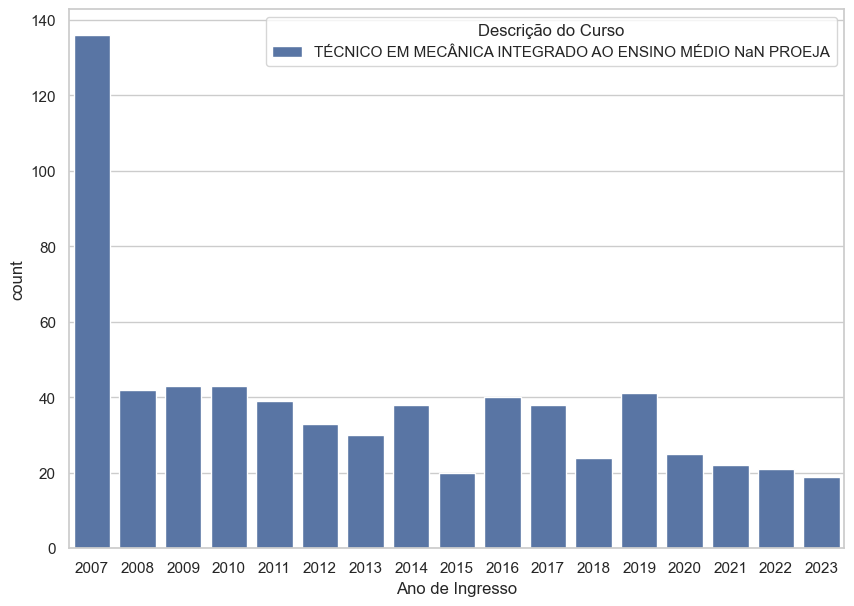

In [88]:
plt.figure(figsize= (10,7))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Descrição do Curso')
plt.show()

# Raça

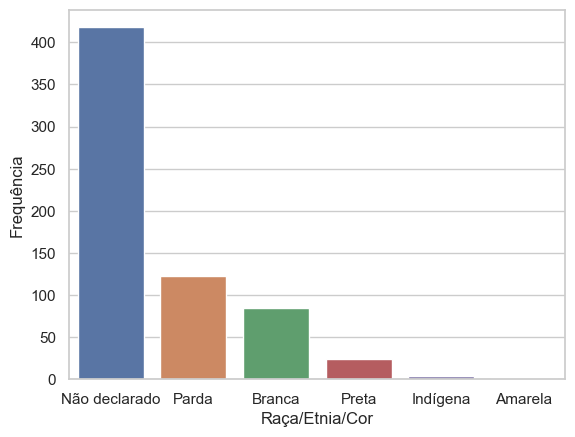

In [89]:
# A primeira informação buscada na análise foi relacionada com raça/etnia/cor, no primeiro gráfico
# é possível observar a quantidade de alunos de cada raça/etnia/cor e também os que não declararam no campus Sertãozinho. 
# Podemos perceber graficamente que o número de brancos é alto em comparação com o restante.
sns.countplot(x = dados['Etnia/Raça/Cor'])
plt.xlabel('Raça/Etnia/Cor')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

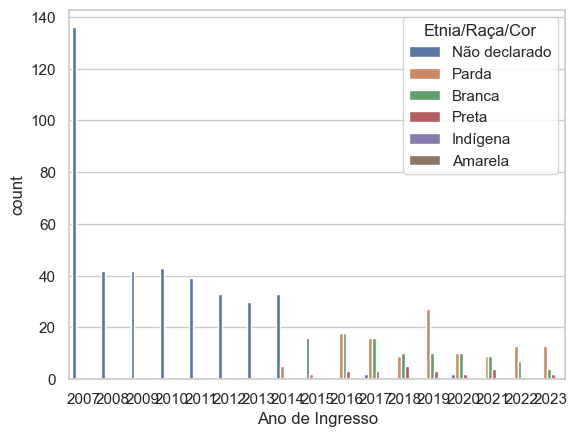

In [49]:
# Após analisarmos a quantidade bruta de alunos com relação a raça/cor/etnia, agora podemos analisar no gráfico 
# a quantidade através dos anos, é possível notar que até dois mil e quinze o alunos quase não se declaravam, após esse ano é possível
# ver que há um aumento significativo no nos alunos se declarando e uma clara diminuição nos que não se declaram.

sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Etnia/Raça/Cor')

plt.show()

In [50]:
dados['Etnia/Raça/Cor'].value_counts()

Não declarado    418
Parda            122
Branca            85
Preta             24
Indígena           4
Amarela            1
Name: Etnia/Raça/Cor, dtype: int64

# Tipo de escolaridade

<Axes: xlabel='Tipo de Escola de Origem', ylabel='count'>

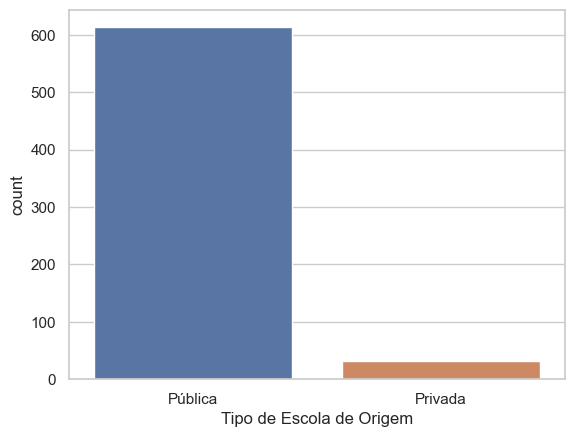

In [51]:
# Neste novo tópico será possivel analisar a escolaridade de origem dos alunos, sendo pública ou privada, uma informação 
# importante para os próximos passos do projeto. No gráfico a seguir existe uma diferença grande entre público e privado, com público sendo maior. 
sns.countplot(x = dados['Tipo de Escola de Origem'])

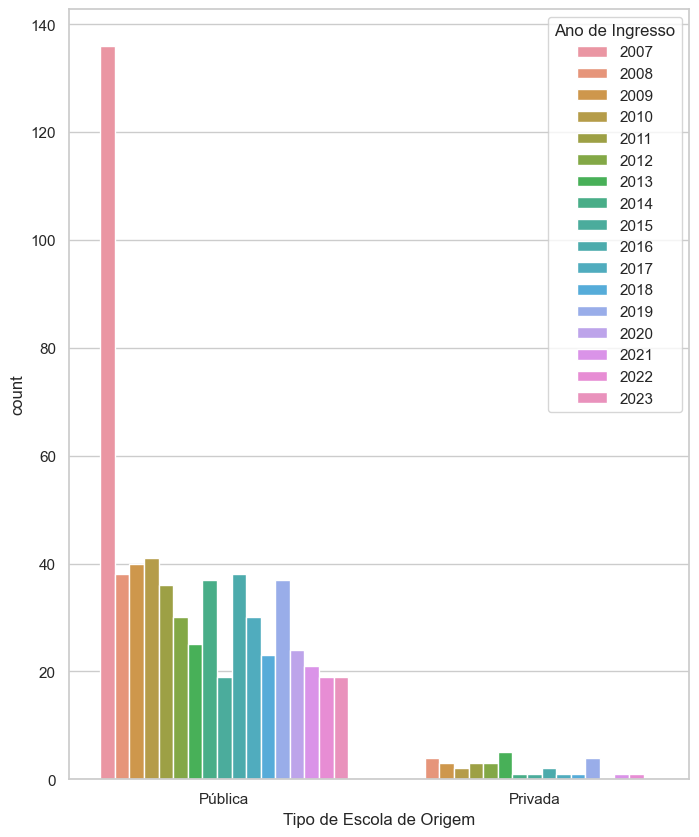

In [52]:
# No gráfico a seguir é possível ver o número de alunos e suas escolaridades de origem ao decorrer dos anos, é interessante analisar
# um aumento de ambas, pública e privada, nos anos de 2021 e 2022, anos de pandemia.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Tipo de Escola de Origem', hue='Ano de Ingresso')
plt.show()

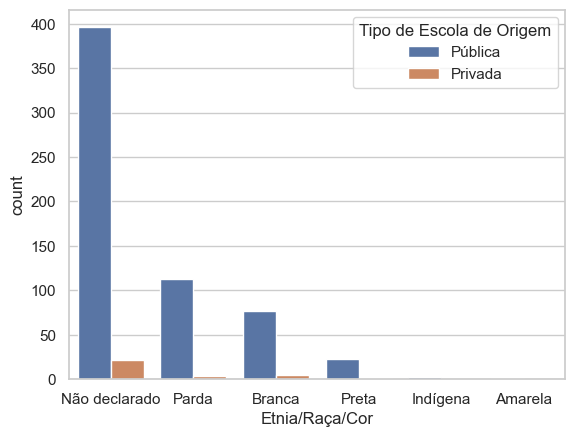

In [53]:
# Outra informação batante relevante para este estudo é mostrado no gráfico abaixo, onde existe uma disparidade alta entre 
# escolas de origem pública e privada, principalmente entre os alunos brancos.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Etnia/Raça/Cor', hue='Tipo de Escola de Origem')
plt.show()

In [54]:
dados['Descrição do Curso'].value_counts()

TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO NaN PROEJA    654
Name: Descrição do Curso, dtype: int64

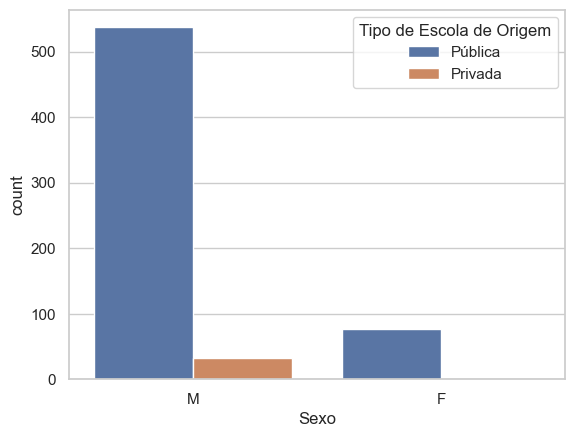

In [55]:
# Nas próximas conclusões que foram possíveis tirar a partir do gráfico abaixo, vemos a diferença entre
# o número de alunos de gênero masculino e feminino com relção a escola de origem, sendo bem perceptível um equilibrio.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Tipo de Escola de Origem')
plt.show()

# Gênero

<Axes: xlabel='Sexo', ylabel='count'>

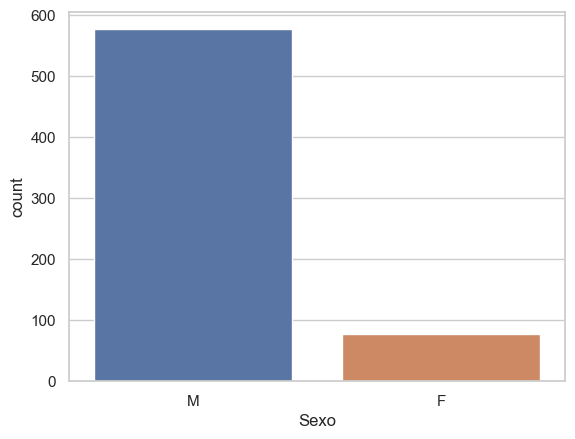

In [56]:
# Agora será feita uma ánalise sobre questões de gênero. Primeiro o gráfico a seguir mostra um equilíbrio entre o número geral de 
# homens e mulheres no campus. Um adendo importante é que os dados se resumem apenas a gênero masculino e feminino. 
sns.countplot(x = dados['Sexo'])

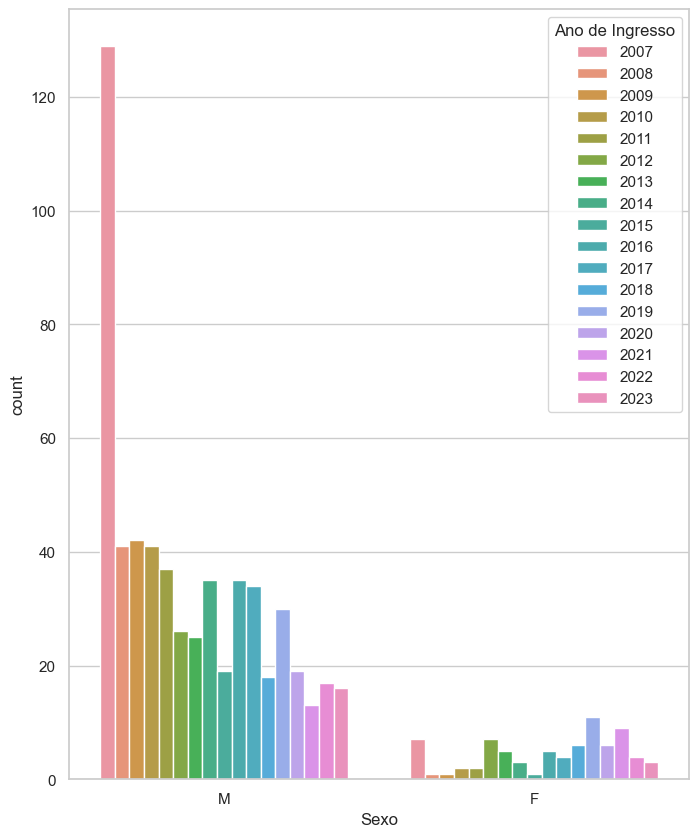

In [57]:
# É possível concluir a partir do próximo gráfico e dos anteriores também, um aumente relevante de alunos, de ambos os gêneros 
# analisados, nos anos de pandemia, pricnipalamente para mulheres no ano de dois mil e vinte um.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Ano de Ingresso')
plt.show()

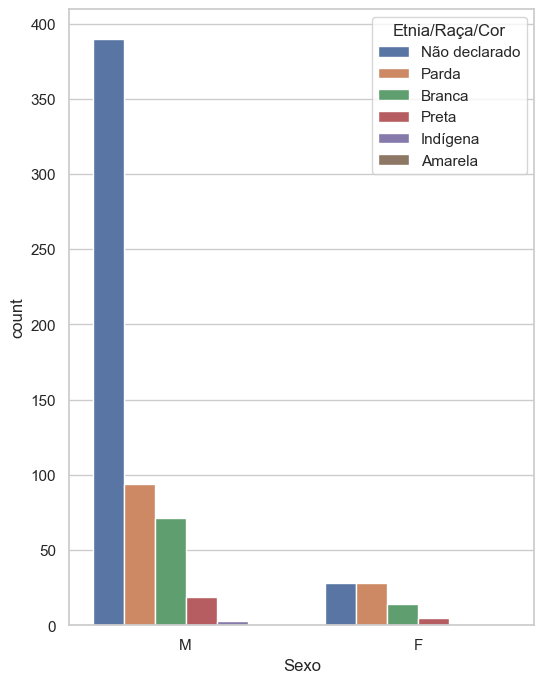

In [58]:
# Com relação a raça, o gráfico a seguir mostra, assim como analisado anteriormente, um grande número de alunos brancos e seguidos 
# por alunos pardos com uma certa distância.
plt.figure(figsize= (6,8))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Etnia/Raça/Cor')
plt.show()

# Evasão

In [59]:
dados['Situação no Curso'].value_counts()

Evasão                             269
Matriculado                        184
Concluído                          155
Cancelado                           40
Transferido Externo                  4
Matrícula Vínculo Institucional      1
Cancelamento Compulsório             1
Name: Situação no Curso, dtype: int64

In [60]:
dados_Evas = dados[dados['Situação no Curso']=='Evasão']

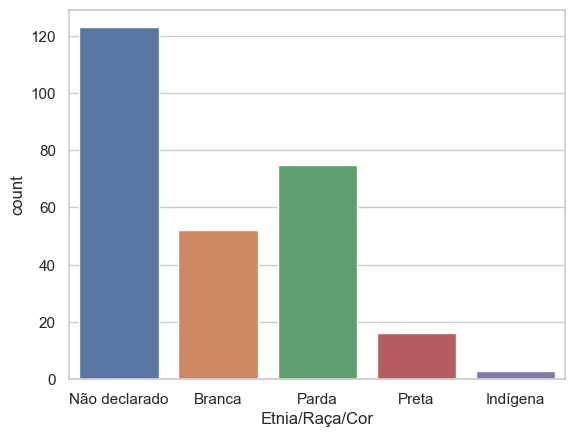

In [61]:
# O tópico de evasão é um dos mais importantes do projeto, nele pode-se observar algumas informações que serão muito importante para as 
# conclusões, no gráfico a seguir foi filtrado uma base de dados só com os alunos que evadiram em relação a raça/etnia/cor.
sns.countplot(x = dados_Evas['Etnia/Raça/Cor'])
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 15

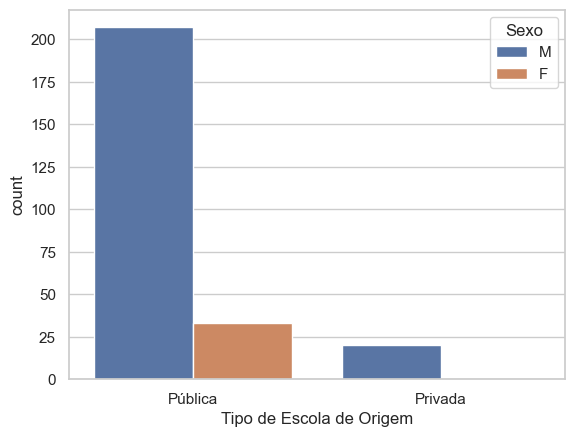

In [62]:
# Agora a análise de evasão é feita pela escola de origem e gênero, é possível perceber um alto número de alunos de origem de escola pública e
# homens que evadem mais. 
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Tipo de Escola de Origem', hue='Sexo')
plt.show()

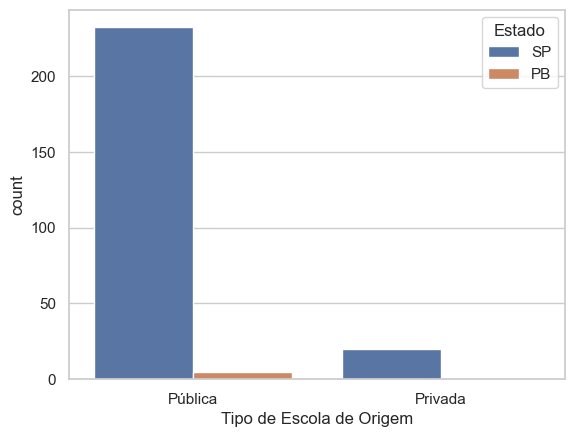

In [110]:
# Agora a análise de evasão é feita pela escola de origem e gênero, é possível perceber um alto número de alunos de origem de escola pública e
# homens que evadem mais. 
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Tipo de Escola de Origem', hue='Estado')
plt.show()

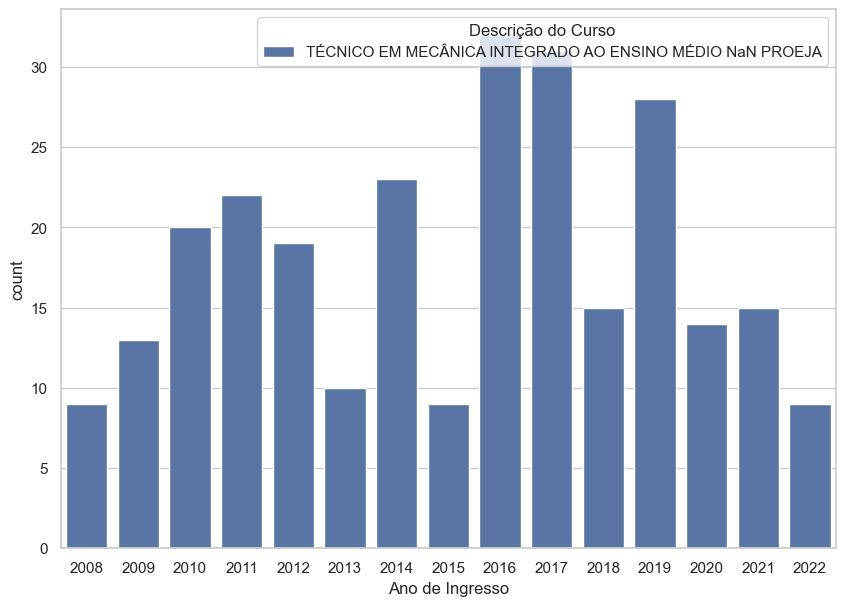

In [86]:
plt.figure(figsize= (10,7))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Ano de Ingresso', hue='Descrição do Curso')
plt.show()

In [64]:
dados['Descrição do Curso'].value_counts()

TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO NaN PROEJA    654
Name: Descrição do Curso, dtype: int64

# Deficiência

In [ ]:
dados_Def = dados[dados['Deficiência']=='PCD']

In [ ]:
dados['Deficiência'].value_counts()

In [ ]:
# O tópico de pessoas com deficiêcia (PCD) é importante para analisarmos o avanço do número geral desses alunos no campus 
# e muito importante para mostrar os avanços de acessibilidade do campus. No gráfico a seguir podemos ver a comparação de alunos PCD com alunos
# sem necessidades especiais.
sns.countplot(x = dados['Deficiência'])
plt.rcParams['xtick.labelsize'] = 8

In [ ]:
dados_Def['Ano de Ingresso'].value_counts()

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Deficiência', hue='Ano de Ingresso')
plt.show()

In [ ]:
plt.figure(figsize= (7,12))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Deficiência', hue='Ano de Ingresso')
plt.show()

# Regras de Associação

In [ ]:
!pip install apyori

In [ ]:
import pandas as pd
from apyori import apriori


In [ ]:
dados_Evas = dados_Evas.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [ ]:
dados_Evas = dados_Evas.drop(["Renda Per Capita"],axis = 1)

In [ ]:
dados_Evas = dados_Evas.drop(["Ano de Ingresso"],axis = 1)

In [ ]:
dados_Evas

In [ ]:
dados_Evas.shape

In [ ]:
dados.shape

In [ ]:
Lista = []
for i in range(len(dados_Evas)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Evas.values[i, j]) for j in range(dados_Evas.shape[1])])

In [ ]:
regras = apriori(Lista, min_support = 0.012, min_confidence = 1, min_lift = 2)
resultados = list(regras)
len(resultados)

In [ ]:
resultados

In [ ]:
dados_Form = dados.loc[dados['Situação no Curso'] == "Concluído"]

In [ ]:
dados_Form = dados_Form.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [ ]:
dados_Form = dados_Form.drop(["Ano de Ingresso"],axis = 1)

In [ ]:
dados_Form = dados_Form.drop(["Renda Per Capita"],axis = 1)

In [ ]:
dados_Form

In [ ]:
Lista = []
for i in range(len(dados_Form)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Form.values[i, j]) for j in range(dados_Form.shape[1])])

In [ ]:
regras = apriori(Lista, min_support = 0.01, min_confidence = 1, min_lift = 2)
resultados = list(regras)
len(resultados)

In [ ]:
resultados